In [2]:
from threading import Timer
import time


class PeriodicCallback(object):
    def __init__(self, lab, function, tfinal, tinterval=1):
        self.lab        = lab
        self.tfinal     = tfinal
        self.tinterval  = tinterval
        self.function   = function
        self._timer     = None
        self.tstart     = time.time()
        self.tnow       = self.tstart
        self.is_running = False
        self.start()

    def _run(self):
        """Run the callback after starting a new Timer."""
        self.is_running = False
        self.start()
        self.function(self.lab, self.tnow)

    def start(self):
        # does nothing if a Timer is already running
        # otherwise create and start a new Timer
        if not self.is_running:
            self.tnow = time.time() - self.tstart
            if self.tnow < self.tfinal:
                self._timer = Timer(self.tinterval - self.tnow % self.tinterval, self._run)
            else:
                self._timer = Timer(self.tinterval - self.tnow % self.tinterval, self.stop)
            self._timer.start()
            self.is_running = True   

    def stop(self):
        self.lab.close()
        self._timer.cancel()
        self.is_running = False

In [3]:
import tclab

SP = 90

def ControlLoop(lab, t):
    PV = lab.T1
    MV = 100 if PV < SP else 0
    lab.U1 = MV
    print(round(t,4), PV, MV)
    
lab = tclab.TCLab()
expt = PeriodicCallback(lab, ControlLoop, 10, 2)

NHduino connected on port /dev/cu.wchusbserial1410 at 115200 baud.
TCLab Firmware 1.2.3.


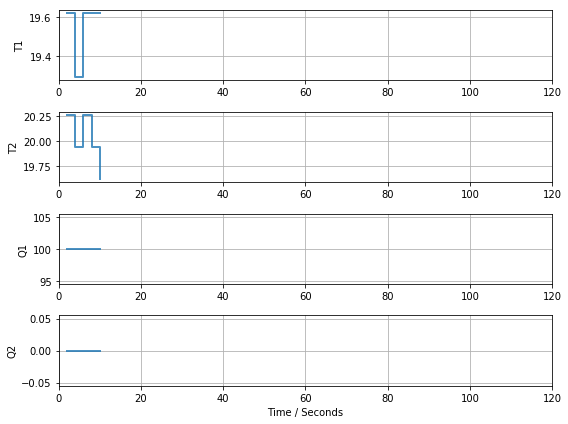

TCLab disconnected successfully.


In [5]:
import tclab

SP = 90

def ControlLoop(lab, t):
    PV = lab.T1
    MV = 100 if PV < SP else 0
    lab.U1 = MV
    print(round(t,4), PV, MV)
    p.update(t)
    
    
lab = tclab.TCLab()
h = tclab.Historian(lab.sources, dbfile=None)
p = tclab.Plotter(h)
expt = PeriodicCallback(lab, ControlLoop, 10, 2)